# 07 - Liquidity Taking Strategy: Momentum/Mean Reversion

Explore how liquidity taking (market order) strategies operate. We'll implement momentum and mean reversion logic in a realistic market simulation.

Objectives:
- Understand what defines a liquidity taker
- Implement both momentum and mean reversion strategies
- Tune parameters and visualize performance
- See real-world uses and limitations


## Strategy Schematic
Minimal diagram: Market Data feeds a trading signal generator. Signal produces market order, sent to execution engine.


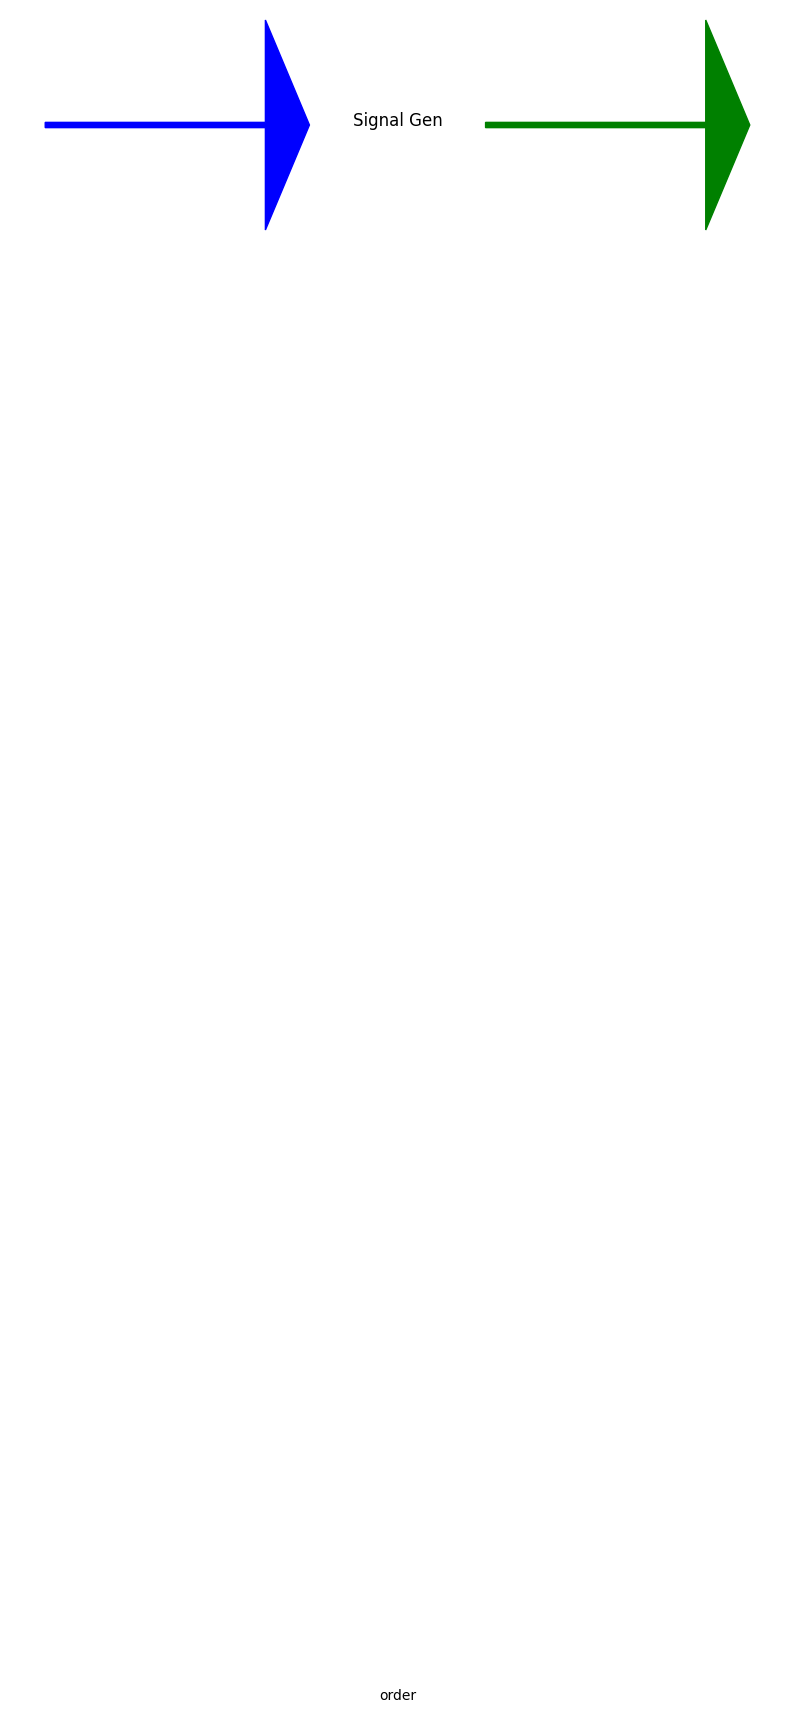

In [1]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 3)); ax.axis('off');
ax.annotate('Market Data', (0.1, 0.5), fontsize=12, ha='center'); ax.annotate('Signal Gen', (0.5, 0.5), fontsize=12, ha='center'); ax.annotate('Exec', (0.9, 0.5), fontsize=12, ha='center'); ax.arrow(0.18,0.5,0.20,0,head_width=0.04, head_length=0.04, color='blue'); ax.arrow(0.58,0.5,0.20,0,head_width=0.04, head_length=0.04, color='green'); ax.text(0.5,0.2,'order',ha='center'); plt.show()

## Code Examples: Strategy Logic

In [2]:
import numpy as np
np.random.seed(1)
prices = 100 + np.cumsum(np.random.randn(500))

def momentum_strategy(prices, lookback=10, threshold=0.0):
    signals = np.zeros(len(prices))
    for t in range(lookback, len(prices)):
        mom = (prices[t] - prices[t - lookback]) / prices[t - lookback]
        if mom > threshold: signals[t] = 1
        elif mom < -threshold: signals[t] = -1
    return signals

def mean_reversion_strategy(prices, lookback=10, threshold=0.0):
    signals = np.zeros(len(prices))
    for t in range(lookback, len(prices)):
        ret = (prices[t] - np.mean(prices[t - lookback:t])) / np.mean(prices[t - lookback:t])
        if ret < -threshold: signals[t] = 1
        elif ret > threshold: signals[t] = -1
    return signals


## Interactive Strategy Visualizer

In [3]:
try:
    import ipywidgets as widgets
    from ipywidgets import interact
    widgets_ok = True
except:
    widgets_ok = False

def plot_strategy(kind='momentum', lookback=10, threshold=0.01):
    if kind == 'momentum':
        signals = momentum_strategy(prices, lookback, threshold)
    else:
        signals = mean_reversion_strategy(prices, lookback, threshold)
    plt.figure(figsize=(10,4))
    plt.plot(prices, label='Price')
    plt.plot(np.where(signals==1)[0], prices[signals==1], '^g', label='Buy', alpha=0.5)
    plt.plot(np.where(signals==-1)[0], prices[signals==-1], 'vr', label='Sell', alpha=0.5)
    plt.legend(); plt.grid(); plt.title(f'{kind.title()} Strategy')
    plt.show()

if widgets_ok:
    interact(plot_strategy, kind=['momentum','mean_reversion'], lookback=(2,50,1), threshold=(0,0.05,0.005))
else:
    plot_strategy()

interactive(children=(Dropdown(description='kind', options=('momentum', 'mean_reversion'), value='momentum'), …

## Exercises
1. Add a transaction cost to the PnL calculation
2. Tune parameters for maximum Sharpe Ratio
3. Extend momentum strategy to skip signals when volatility very high

Solutions are toggleable below.

In [4]:
show_solutions = False
try:
    import ipywidgets as widgets
    btn = widgets.ToggleButton(value=False, description='Show Solutions')
    display(btn)
    def on_toggle(change):
        global show_solutions
        show_solutions = change['new']
    btn.observe(on_toggle, 'value')
except: pass
if show_solutions:
    print('1. Add cost: pnl -= transaction_cost * abs(signal)')
    print('2. Optimize by sweeping lookback, threshold and computing mean/std of returns.')
    print('3. Add `if np.std(prices[t-lookback:t]) > vol_thresh: signals[t]=0`')

ToggleButton(value=False, description='Show Solutions')

## Performance Benchmarks
Speed of vectorized vs looped signal computation.

In [5]:
import time
start = time.time()
for _ in range(30):
    momentum_strategy(prices, 10, 0.01)
print(f'Momentum loops: {(time.time()-start):.3f}s')

start = time.time()
for _ in range(30):
    signals = (prices[10:] - prices[:-10])/prices[:-10]
print(f'Momentum vectorized: {(time.time()-start):.3f}s')

Momentum loops: 0.006s
Momentum vectorized: 0.000s


## Real-world Applications
- Liquid ETF market making
- Latency arbitrage
- Intraday trend/range reversal detection
- Trading microstructure studies
